# AIPI 590 - XAI | Human-AI Interaction
### A code tutorial explaining LIME in code
### Mariam Khan

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mkhan13/XAI/blob/main/human_ai_interaction.ipynb)

# LIME

LIME (Local Interpretable Model-agnostic Explanations) helps us to understand why a machine learning model made a specific prediction by creating a local, interpretable model around one specific instance. From the explainable AI lecture, the LIME Process is:


1. Select instance of interest
2. Perturb your dataset and get black box predictions for perturbed samples
3. Generate a new dataset consisting of perturbed samples (variations of your data) and the corresponding predictions
4. Train an interpretable model, weighted by the proximity of sampled instances to the instance of interest
5. Interpret the local model to explain prediction

In this tutorial, I will be teaching you how to apply LIME to your dataset to explain the model's predictions.


In [2]:
# Imports
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

## Load and Prepare Dataset and Model
In this tutorial, I will be using the sci-kit learn 'digits' dataset using a Random Forest Model to walk through the 5 steps of the LIME process. You can use any dataset that _____. Before you can implement LIME, you have to split your dataset and train your model.

In [3]:
digits = load_digits() # Digits dataset has handwritten digits 0-9
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Train and test split

scaler = StandardScaler() # Standardize features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42, n_estimators=500)
model.fit(X_train_scaled, y_train)

print("Model Accuracy:", model.score(X_test_scaled, y_test))

Model Accuracy: 0.9777777777777777


## Step 1: Select Instance of Interest
First, you select one data point to focus on. You can study the models behavior around that point to understand why the model made that specific decision. This step is important because LIME focuses on one prediction at a time.

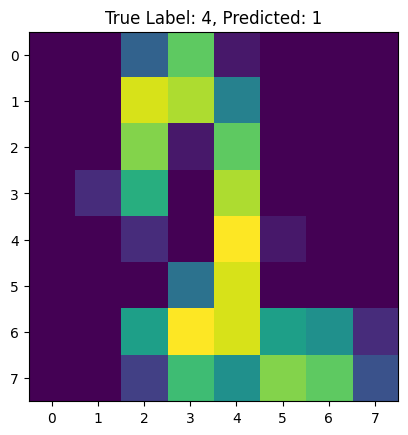

In [4]:
instance_index = 12 # Random instance to explain
sample_instance = X_test[instance_index]
true_label = y_test[instance_index]
predicted_label = model.predict([sample_instance])[0]

plt.imshow(digits.images[instance_index]) # Display image
plt.title(f"True Label: {true_label}, Predicted: {predicted_label}")
plt.show()

## Step 2/3: Perturb Your Dataset and Get Black-Box Predictions for Perturbed Samples and Generate a New Dataset
Perturbing your dataset means you slightly modify the selected data point's features to create new samples that are similar but not identical to the original. You then use the original black-box model to get predictions for these perturbed samples. This step helps LIME examine how the model reacts to small input changes near the selected instance.  

Then you combine the perturbed samples and the model predictions into a new dataset. This new dataset represents a local neighborhood around the data point which shows how feature changes influence the model's outputs.

In [5]:
explainer = LimeTabularExplainer( # Initialize LIME explainer for tabular data
    training_data=X_train_scaled,
    feature_names=[f'pixel_{i}' for i in range(X.shape[1])],
    class_names=[str(i) for i in range(10)], # Convert class names to strings
    mode='classification'
)

## Step 4: Train an Interpretable Model Weighted by Proximity

Next, you fit a human-understandable model that approximates the complex black-box model for the new purturbed dataset. This step helps LIME approximate the model's decision boundary.

In [8]:
exp = explainer.explain_instance( # Generate a local explanation for the selected instance
    data_row=sample_instance,
    predict_fn=model.predict_proba, # Use model probabilities for explanation
    num_features=15
)

## Step 5: Interpret the Local Model to Explain the Prediction
Finally, you interpret the local model’s parameters to explain the prediction. The bars in the graph show how much each feature contributed positively or negatively to the output.

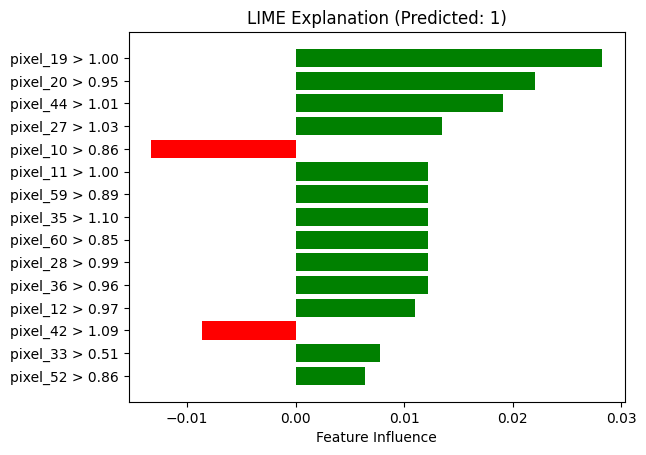

In [9]:
features, weights = zip(*exp.as_list()) # Extract features and their weights

plt.barh(features, weights, color=['green' if w > 0 else 'red' for w in weights])
plt.title(f"LIME Explanation (Predicted: {predicted_label})")
plt.xlabel("Feature Influence")
plt.show()

By following the steps in this tutorial, you can easily use LIME to translate a complex model's behavior into a simple, human-readable explanation.